# クラス分類
アイリスデータセットを使って花の品種を当てる(予測する)  

アイリスデータセット:  
花の品種、がく片の長さ、がく片の幅、花弁の長さ、花弁の幅が記録されている

# データの可視化

<IPython.core.display.Javascript object>


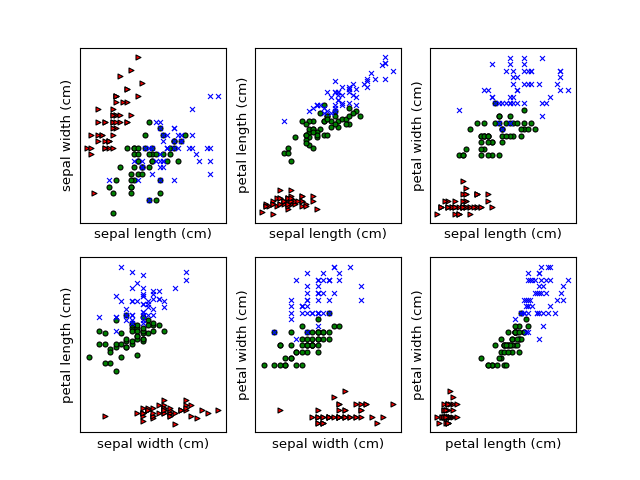

In [4]:
# パッケージのインポート
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
# jupyter-notebook内にmatplotlibの内容を表示させる場合には
# %matplotlib inline, matplotlib notebookが必要
%matplotlib notebook

# データのロード
data = load_iris()

# 計測データ(本ではfeaturesと呼んでいる)
features = data["data"]
# 各計測データの名称(がく片の長さetc.)
feature_names = data["feature_names"]
# 各個体の品種(番号0~2の3種類)
target = data["target"]
# 品種の名前
target_names = data["target_names"]
# 各個体の品種の名前
labels = target_names[target]

# 2Dで描画するために縦軸横軸の全通りを網羅
all_axis_pattern = [[0,1], [0,2], [0,3], [1,2], [1,3], [2,3]]
fig_cols = 3
fig_rows = 2
for figure_i, axis in enumerate(all_axis_pattern):
    for t,marker,c in zip(range(3), ">ox","rgb"):
        # クラスごとに色の異なるマーカでプロットする
        plt.subplot(fig_rows,fig_cols,figure_i+1)# subplotに与える図番号は0からではなく1からスタート
        xaxis = axis[0]
        yaxis = axis[1]
        plt.xticks([])
        plt.yticks([])
        plt.scatter(features[target == t, xaxis], features[target == t, yaxis], marker=marker,c=c)
        plt.xlabel(feature_names[xaxis])
        plt.ylabel(feature_names[yaxis])
plt.show()

## 分類モデルを作成
可視化した結果を見てみると(下段左)、赤色とそれ他の色、つまりsetosa種とそうでない品種(versicolor, virginica)、は何となく分離しやすそう。
まずはじめに花弁の長さ(petal length)だけを使って分類を試す

In [5]:
# 花弁の長さだけを抽出
plength = features[:,2]
is_setosa = (labels=="setosa")

# setosa種とそうでない品種の花弁の長さ
max_setosa = plength[is_setosa].max()
min_non_setosa = plength[~is_setosa].min()
print("Maximum of setosa: {0}".format(max_setosa))
print("Minimum of setosa: {0}".format(min_non_setosa))

Maximum of setosa: 1.9
Minimum of setosa: 3.0


花弁の長さ(petal length)という一次元の情報だけで、「setosaかそうでないか」の分類はできるかもしれない。  
しかし、残りの品種(versicolor, virginica)の分類は、一筋縄ではいかなそう・・・。最善の方法で分類を試みる。

In [7]:
# 
features_not_setosa = features[~is_setosa]
labels_not_setosa = labels[~is_setosa]
virginica = (labels_not_setosa == "virginica")